In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from openpyxl import load_workbook


In [2]:
file_path = Path.cwd() / 'template.xlsx'
sheet_name = "Presupuesto mensual personal"

# Ejemplos de lecturas parciales de excel

En algunos casos es necesario leer solo una parte de un archivo excel, para poder manejar adecuadamente los datos.

![ExcelFile](images/img_1.png)

Por ejemplo, si solo se necesita leer la seccion de "INGRESOS MENSUALES PREVISTOS" se puede especificar en el parámetro `usecols` las columnas que se desean leer. Además, se puede saltar las filas iniciales con el parámetro `skiprows` y limitar el número de filas a leer con el parámetro `nrows`.

![ExcelFileTable1](images/img.png)

En codigo podemos hacerlo de la siguiente manera
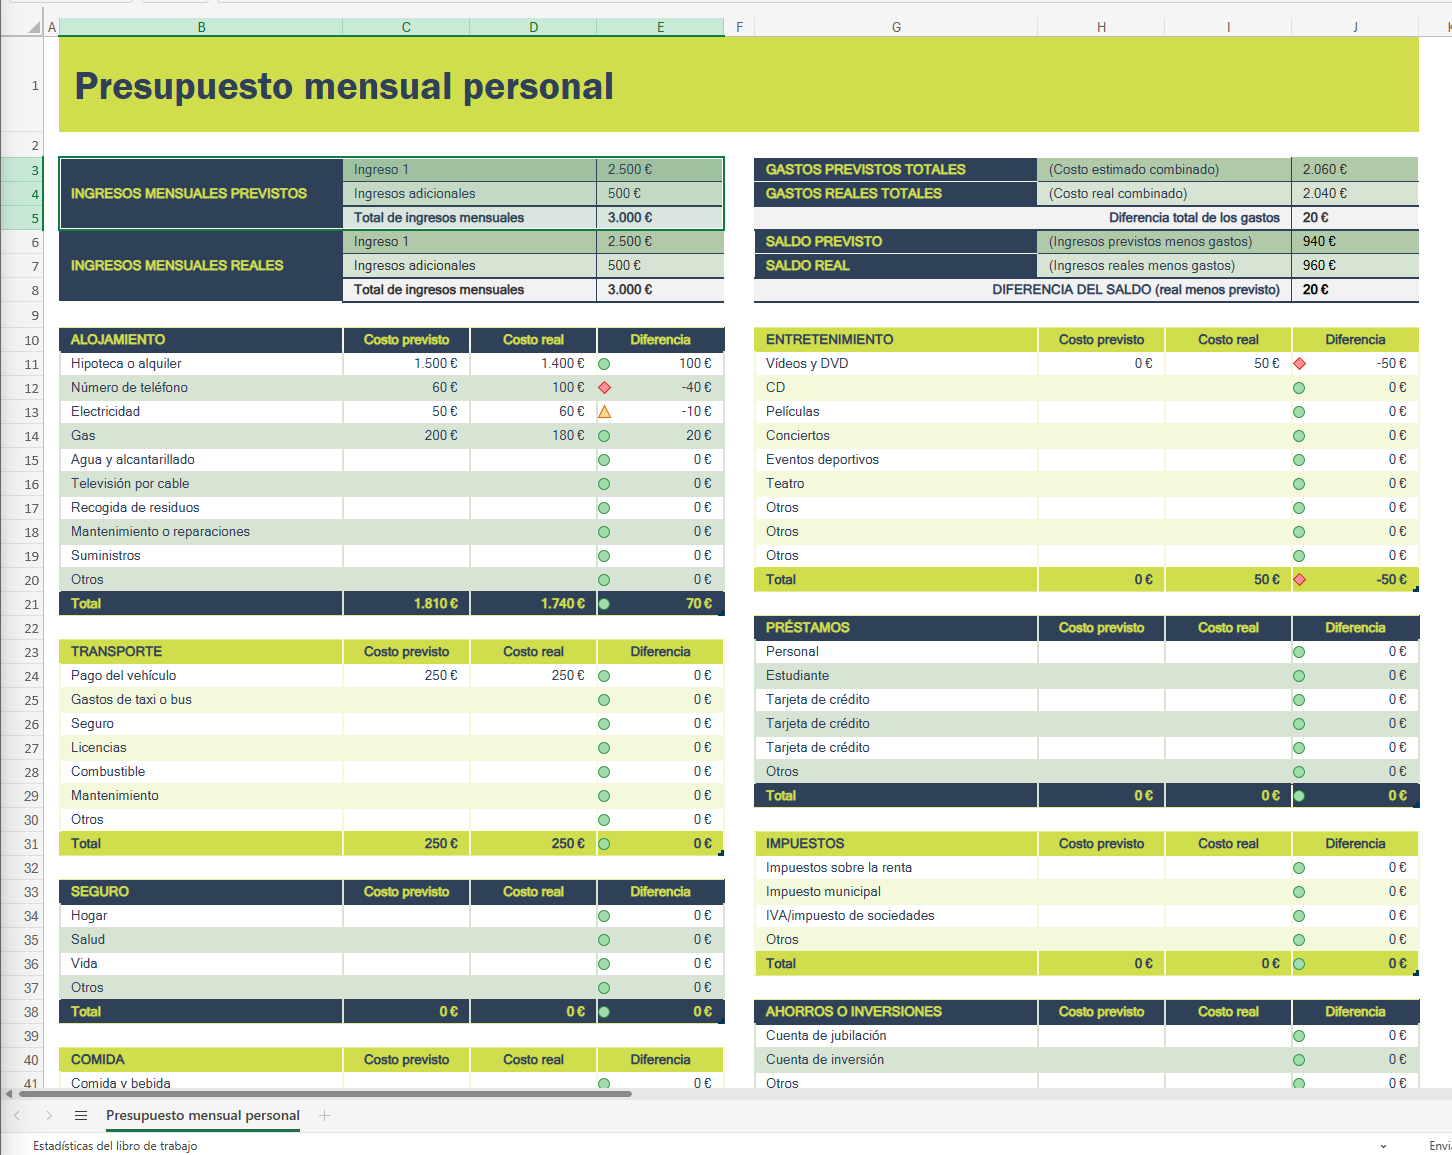

In [3]:
excel_file = pd.ExcelFile(file_path)


In [4]:

ingresos_mensuales_previstos = excel_file.parse(
    sheet_name,
    # No tenemos headers
    header=None,
    # usamos las columnas 2, 3 y 4
    usecols=[2, 3, 4],
    # saltamos las primeras 2 filas
    skiprows=2,
    # leemos 3 filas
    nrows=3
)
ingresos_mensuales_previstos

,2,3,4
0,Ingreso 1,NaN,2500
1,Ingresos adicionales,NaN,500
2,Total de ingresos mensuales,NaN,3000


En el archivo excel la columna 2 y 3 estan combinadas, pero al leer el archivo, el valor de estas columnas se guarda unicamente en la primera por lo tanto la columna 3 viene vacia y los datos son guardados en la columna 2.

Para hacer esta tabla mas entendible, podemos renombrar las columnas para que sean mas descriptivas, ademas de eliminar la columna que no nos proporciona informacion.

In [5]:
# Eliminamos la columna 3 (vacia)
# el parametro inplace=True hace que la operacion se realice sobre la tabla original
ingresos_mensuales_previstos.drop(columns=[3], inplace=True)
ingresos_mensuales_previstos
# Una alternativa para evitar el uso de inplace=True es
# ingresos_mensuales_previstos = ingresos_mensuales_previstos.drop(columns=[3])

,2,4
0,Ingreso 1,2500
1,Ingresos adicionales,500
2,Total de ingresos mensuales,3000


In [6]:
# Revisamos el nombre de las columnas
print(ingresos_mensuales_previstos.columns)

Index([2, 4], dtype='int64')


In [7]:
# Renombramos las columnas
ingresos_mensuales_previstos.rename(columns={2: "Descripcion", 4: "Ingresos"}, inplace=True)
ingresos_mensuales_previstos

,Descripcion,Ingresos
0,Ingreso 1,2500
1,Ingresos adicionales,500
2,Total de ingresos mensuales,3000


In [8]:
# Lectura de las otras tablas, en este ejemplo hay tabla por categoria de gastos ALOJAMIENTO, ENTRETENIMIENTO, TRANSPORTE, ETC.
# Podemos Leerlas de la misma manera que la tabla de ingresos y posteriormente combinarlas.

df_alojamiento = excel_file.parse(sheet_name, usecols="B:E", skiprows=9, nrows=10)
# creamos una variable para guardar la categoria de la tabla
df_alojamiento["Categoria"] = "alojamiento"
df_alojamiento_primera_columna = df_alojamiento.columns[0]
df_alojamiento.rename(columns={df_alojamiento_primera_columna: "Description"}, inplace=True)
print(df_alojamiento)

df_transporte = excel_file.parse(sheet_name, usecols="B:E", skiprows=22, nrows=8)
df_transporte["Categoria"] = "transporte"
df_transporte_primera_columna = df_transporte.columns[0]
df_transporte.rename(columns={df_transporte_primera_columna: "Description"}, inplace=True)
print(df_transporte)

df_seguro = excel_file.parse(sheet_name, usecols="B:E", skiprows=32, nrows=4)
df_seguro["Categoria"] = "seguro"
df_seguro_primera_columna = df_seguro.columns[0]
df_seguro.rename(columns={df_seguro_primera_columna: "Description"}, inplace=True)
print(df_seguro)

df_comida = excel_file.parse(sheet_name, usecols="B:E", skiprows=39, nrows=3)
df_comida["Categoria"] = "comida"
df_comida_primera_columna = df_comida.columns[0]
df_comida.rename(columns={df_comida_primera_columna: "Description"}, inplace=True)
print(df_comida)

df_mascotas = excel_file.parse(sheet_name, usecols="B:E", skiprows=45, nrows=5)
df_mascotas["Categoria"] = "mascotas"
df_mascotas_primera_columna = df_mascotas.columns[0]
df_mascotas.rename(columns={df_mascotas_primera_columna: "Description"}, inplace=True)
print(df_mascotas)

df_cuidado_personal = excel_file.parse(sheet_name, usecols="B:E", skiprows=53, nrows=8)
df_cuidado_personal["Categoria"] = "cuidado personal"
df_cuidado_personal_primera_columna = df_cuidado_personal.columns[0]
df_cuidado_personal.rename(columns={df_cuidado_personal_primera_columna: "Description"}, inplace=True)
print(df_cuidado_personal)





  Description  Costo previsto  Costo real  Diferencia Categoria
0      Comida             NaN         NaN         0.0  mascotas
1     Médicos             1.0         0.5         0.5  mascotas
2    Limpieza            10.0         9.5         0.5  mascotas
3    Juguetes             NaN         NaN         0.0  mascotas
4       Otros             NaN         NaN         0.0  mascotas
                         Description  Costo previsto  Costo real  Diferencia  \
0                            Médicos             NaN         NaN           0   
1                        Pelo y uñas             NaN         NaN           0   
2                               Ropa             NaN         NaN           0   
3                         Tintorería             NaN         NaN           0   
4                           Gimnasio             NaN         NaN           0   
5  Tasas o cuotas de la organización             NaN         NaN           0   
6                              Otros             NaN    

In [9]:
df_categories = pd.concat([
    df_alojamiento,
    df_transporte,
    df_seguro,
    df_comida,
    df_mascotas,
    df_cuidado_personal,
])

In [10]:
df_categories = df_categories[df_categories["Description"] != "Total"]
df_categories

,Description,Costo previsto,Costo real,Diferencia,Categoria
0,Hipoteca o alquiler,1500.0,1400.0,100.0,alojamiento
1,Número de teléfono,60.0,100.0,-40.0,alojamiento
2,Electricidad,50.0,60.0,-10.0,alojamiento
3,Gas,200.0,180.0,20.0,alojamiento
4,Agua y alcantarillado,NaN,NaN,0.0,alojamiento
5,Televisión por cable,NaN,NaN,0.0,alojamiento
6,Recogida de residuos,NaN,NaN,0.0,alojamiento
7,Mantenimiento o reparaciones,NaN,NaN,0.0,alojamiento
8,Suministros,NaN,NaN,0.0,alojamiento
9,Otros,NaN,NaN,0.0,alojamiento


![Categorias](images/img_2.png)

In [11]:
# con esta instruccion podemos ver la suma de los ingresos por categoria ("Total")
df_categories.groupby("Categoria").sum()
#(by="Categoria").sum()

,Description,Costo previsto,Costo real,Diferencia
Categoria,,,,
alojamiento,Hipoteca o alquilerNúmero de teléfonoElectrici...,1810.0,1740.0,70.0
comida,Comida y bebidaRestaurantesOtros,0.0,0.0,0.0
cuidado personal,MédicosPelo y uñasRopaTintoreríaGimnasioTasas ...,0.0,0.0,0.0
mascotas,ComidaMédicosLimpiezaJuguetesOtros,11.0,10.0,1.0
seguro,HogarSaludVidaOtros,0.0,0.0,0.0
transporte,Pago del vehículoGastos de taxi o busSeguroLic...,250.0,250.0,0.0


Otro acercamiento a la lectura de documentos puede ser crear una funcion a medida por ejemplo.

Supongamos que el mismo archivo es usado por multiples personas y cada una de ellas agregan sus propias categorias y subcategorias, lo que puede dificultar la lectura y el análisis de los datos. En este caso, una función personalizada podría ser útil para automatizar el proceso de lectura y análisis de los datos, lo que facilitaría la tarea y reduciría el tiempo de procesamiento.

In [12]:
def _norm(x: object) -> str:
    return str(x).strip() if x is not None else ""

def extract_category_table(
    file_path: str,
    sheet_name: str,
    category: str,
    header_keywords=("Costo previsto", "Costo real", "Diferencia"),
    stop_words=("Total",),
) -> pd.DataFrame:
    wb = load_workbook(file_path, data_only=True)
    ws = wb[sheet_name]

    category = category.strip()

    # 1) Encontrar la celda con el nombre de la categoría
    cat_row = None
    cat_col = None
    for row in ws.iter_rows(values_only=False):
        for cell in row:
            if _norm(cell.value).upper() == category.upper():
                cat_row, cat_col = cell.row, cell.column
                break
        if cat_row is not None:
            break
    if cat_row is None:
        raise ValueError(f"No encontré la categoría '{category}' en la hoja '{sheet_name}'")

    # 2) Encontrar la fila de encabezados (buscando keywords cerca de la fila de la categoría)
    header_row = None
    header_cols = {}  # keyword -> col
    search_start = cat_row
    search_end = min(cat_row + 5, ws.max_row)
    # return f"Buscando headers cerca de la fila {cat_row}, cat_col {cat_col} (entre {search_start} y {search_end})"

    for r in range(search_start, search_end + 1):
        found = {}
        for c in range(cat_col, ws.max_column + 1):
            v = _norm(ws.cell(row=r, column=c).value)
            if not v:
                continue
            for kw in header_keywords:
                if v.lower() == kw.lower():
                    if not found.get(kw):
                        found[kw] = c
        if len(found) >= 2:
            header_row = r
            header_cols = found
            break
    # return header_cols

    if header_row is None:
        raise ValueError(
            f"Encontré '{category}' pero no encontré headers {header_keywords} cerca (fila {cat_row})."
        )

    # 3) Determinar columnas de la tabla:
    # - Primera columna (descripción) = columna de la categoría (A en tu plantilla, pero lo dejamos genérico)
    # - Resto = columnas donde están los keywords
    desc_col = cat_col
    data_cols = [desc_col] + [header_cols[k] for k in header_keywords if k in header_cols]

    # 4) Leer filas de datos desde la fila siguiente al header hasta 'Total' o fila vacía
    rows = []
    r = header_row + 1
    while r <= ws.max_row:
        desc = _norm(ws.cell(row=r, column=desc_col).value)

        # condición de parada: fila vacía (no hay descripción) y tampoco hay números en columnas de costos
        numeric_cells = [ws.cell(row=r, column=c).value for c in data_cols[1:]]
        if desc == "" and all(v in (None, "") for v in numeric_cells):
            break

        # condición de parada: "Total" en la descripción
        if desc and any(desc.strip().lower().startswith(w.lower()) for w in stop_words):
            break

        row_values = [ws.cell(row=r, column=c).value for c in data_cols]
        rows.append(row_values)
        r += 1

    # 5) Construir DataFrame con nombres de columnas
    columns = [category, *header_keywords[: len(data_cols) - 1]]
    df = pd.DataFrame(rows, columns=columns)

    # Limpieza típica
    df = df.dropna(how="all")
    return df
#
def extract_all_categories(
    file_path: str,
    sheet_name: str,
    categories: list[str],
) -> dict[str, pd.DataFrame]:
    out = {}
    for cat in categories:
        out[cat] = extract_category_table(file_path, sheet_name, cat)
    return out


In [13]:
categories = ["ALOJAMIENTO", "ENTRETENIMIENTO", "TRANSPORTE", "PRÉSTAMOS", "IMPUESTOS", "SEGURO", "COMIDA", "AHORROS O INVERSIONES", "MASCOTAS", "REGALOS Y DONACIONES", "LEGAL", "CUIDADO PERSONAL"]
tables = extract_all_categories("template.xlsx", "Presupuesto mensual personal", categories)

for cat_name, table in tables.items():
    table_primera_columna = table.columns[0]
    table.rename(columns={table_primera_columna: "Description"}, inplace=True)
    table["categoria"] = cat_name
    tables[cat_name] = table

df_all_categories = pd.concat(tables.values())
df_all_categories.groupby("categoria").sum().drop(columns=["Description"]).head(20)

,Costo previsto,Costo real,Diferencia
categoria,,,
AHORROS O INVERSIONES,200.0,100.0,100.0
ALOJAMIENTO,1810.0,1740.0,70.0
COMIDA,0,0,0.0
CUIDADO PERSONAL,0,0,0.0
ENTRETENIMIENTO,0.0,50.0,-50.0
IMPUESTOS,0,0,0.0
LEGAL,0,0,0.0
MASCOTAS,11.0,10.0,1.0
PRÉSTAMOS,0,0,0.0
